In [673]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [674]:
## read data
raw_data=pd.read_csv('train.csv')
raw_test=pd.read_csv('test.csv')
raw_tot = pd.concat([raw_data,raw_test],ignore_index=True)

## Process Missing Data

In [675]:
## process missing data
## the embark, age, cabin data are missing

raw_tot[raw_tot["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [676]:
## from the class and fare and embarked 'S' has the highest count
## just simply fill the two missing data 'S'
raw_tot['Embarked']=raw_tot['Embarked'].fillna('S')
raw_tot[raw_tot["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [677]:
## Age data is correlated with Pclass, SibSp, Parch, and new feature title
## so we Create new feature title first
def getTitle(title):
    return title.split(",")[1].split(".")[0].strip()
raw_tot["Title"]=raw_tot["Name"].apply(getTitle)
raw_tot.drop('Name', axis = 1,inplace=True)
raw_tot.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,0,5,3,male,0,0.0,373450,Mr


In [678]:
# first trial replace missing age with median with Title
columns=['title','med']
median_table = pd.DataFrame(columns=columns)
i=0;
title = raw_tot["Title"].unique()
med_list=[]
for tit in title:
    med_list.append(raw_tot[raw_tot["Title"]==tit]["Age"].median())
#data = pd.DataFrame({'title': 1, 'med': raw_tot[raw_tot["Title"]==tit]["Age"].median()})
#median_table.append(data)
    #i=i+1
data={'title':title,'med':med_list}
median_table = pd.DataFrame(data=data,columns=columns)
#median_table 
median_table

,title,med
0,Mr,29.0
1,Mrs,35.5
2,Miss,22.0
3,Master,4.0
4,Don,40.0
5,Rev,41.5
6,Dr,49.0
7,Mme,24.0
8,Ms,28.0
9,Major,48.5


In [679]:
for index, row in raw_tot.iterrows():
     if np.isnan(row['Age']):
            raw_tot.set_value(index,'Age', median_table[median_table["title"]==row['Title']]["med"])

In [680]:
raw_tot[raw_tot["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title


In [681]:
raw_tot.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,0,5,3,male,0,0.0,373450,Mr


In [682]:
np.isnan(raw_tot.iloc[0]["Cabin"])

True

In [683]:
### cabin data
## first trial: just check whether there is 
#def getCab(cabin):
#    if isinstance(cabin, float):
#        return 0
#    else:
#        return 1
#raw_tot['is_Cabin']=raw_tot['Cabin'].apply(getCab)

def getCabL(cabin):
    if isinstance(cabin, str):
        return str(cabin)[0]
    else:
        return 'n'

raw_tot['Cabin_Letter'] = raw_tot['Cabin'].apply(getCabL)
    
def getCabN(cabin_no):
    if isinstance(cabin_no, str):
        return len(cabin_no.split(' '))
    else:
        return 0    

## add letter of cabin
raw_tot['Cabin_Num'] = raw_tot['Cabin'].apply(getCabN)

raw_tot.drop('Cabin',axis=1,inplace=True)

In [684]:
raw_tot.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Cabin_Letter,Cabin_Num
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,Mr,n,0
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,Mrs,C,1
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,Miss,n,0
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,Mrs,C,1
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,Mr,n,0


In [685]:
## Fare data: only 1 missing
## add according to Pclass and Embark
raw_tot['Fare']=raw_tot['Fare'].fillna(-1)
raw_tot[raw_tot['Fare']==-1] 

raw_tot.loc[raw_tot['Fare']==-1,"Fare"]=raw_tot.loc[(raw_tot["Pclass"]==3) & (raw_tot["Embarked"]=='S')]["Fare"].median()
raw_tot['Fare'].isnull().sum()

0

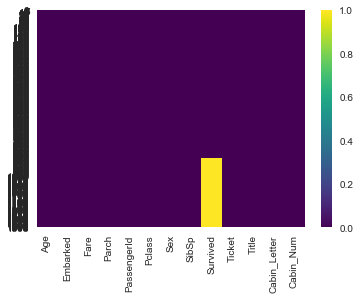

In [686]:
sns.heatmap(raw_tot.isnull(), cmap='viridis')

### Recreate Features

In [687]:
## is Alone
#for index, row in raw_tot.iterrows():
#    if row['SibSp']+row['Parch']>0:
#        raw_tot['isAlone']=0
#    else:
#        raw_tot['isAlone']=1
        
## Family Size
for index, row in raw_tot.iterrows():
    if row["SibSp"]+row["Parch"] > 3:
        raw_tot.loc[index,'Fam_Size']='L'
    elif  row["SibSp"]+row["Parch"] > 0:
        raw_tot.loc[index,'Fam_Size']='S'
    else:
        raw_tot.loc[index,'Fam_Size']='N'




In [688]:
raw_tot.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Cabin_Letter,Cabin_Num,Fam_Size
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,Mr,n,0,S
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,Mrs,C,1,S
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,Miss,n,0,N
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,Mrs,C,1,S
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,Mr,n,0,N


In [689]:
raw_tot['SibSp'].iloc[0]+raw_tot['Parch'].iloc[0]

1

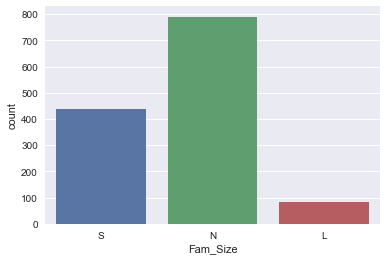

In [690]:
sns.countplot(x='Fam_Size',data=raw_tot)

In [691]:
FamS_dummies= pd.get_dummies(raw_tot.Fam_Size,prefix='Fam_Size' )
FamS_dummies.head()

,Fam_Size_L,Fam_Size_N,Fam_Size_S
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [692]:
CabinNum_dummies= pd.get_dummies(raw_tot.Cabin_Num,prefix='CabN' )
CabinNum_dummies.head()

,CabN_0,CabN_1,CabN_2,CabN_3,CabN_4
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [693]:
CabinLet_dummies= pd.get_dummies(raw_tot.Cabin_Letter,prefix='CabN' )
CabinLet_dummies.head()

,CabN_A,CabN_B,CabN_C,CabN_D,CabN_E,CabN_F,CabN_G,CabN_T,CabN_n
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [694]:
## Title
## Mark title except Mr/Miss/Mrs/Master to Rare
raw_tot['Title']=raw_tot['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

raw_tot['Title']=  raw_tot['Title'].replace('Mlle', 'Miss')
raw_tot['Title']=  raw_tot['Title'].replace('Ms', 'Miss')
raw_tot['Title']=  raw_tot['Title'].replace('Mme', 'Mrs')


In [695]:
title_dummies= pd.get_dummies(raw_tot.Title,prefix='Pclass' )
title_dummies.head()

,Pclass_Master,Pclass_Miss,Pclass_Mr,Pclass_Mrs,Pclass_Rare
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [696]:
embark_dummies= pd.get_dummies(raw_tot.Embarked,prefix='Embark' )
embark_dummies.head()

,Embark_C,Embark_Q,Embark_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [697]:
sex_dummies= pd.get_dummies(raw_tot.Sex,prefix='Embark' )
sex_dummies.head()

,Embark_female,Embark_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [698]:
raw_tot.drop('Ticket',axis=1,inplace=True)
raw_tot.drop('Sex',axis=1,inplace=True)
raw_tot.drop('Title',axis=1,inplace=True)
raw_tot.drop('Embarked',axis=1,inplace=True)
raw_tot.drop('Cabin_Letter',axis=1,inplace=True)
raw_tot.drop('Cabin_Num',axis=1,inplace=True)
raw_tot.drop('Fam_Size',axis=1,inplace=True)



PassengerId=raw_tot['PassengerId'][891:]
raw_tot.drop('PassengerId',axis=1,inplace=True)


In [699]:
raw_tot.head()

,Age,Fare,Parch,Pclass,SibSp,Survived
0,22.0,7.2500,0,3,1,0.0
1,38.0,71.2833,0,1,1,1.0
2,26.0,7.9250,0,3,0,1.0
3,35.0,53.1000,0,1,1,1.0
4,35.0,8.0500,0,3,0,0.0


In [700]:
raw_tot=pd.concat([raw_tot,FamS_dummies, CabinNum_dummies,CabinLet_dummies,title_dummies,embark_dummies,sex_dummies],axis=1)

In [701]:
raw_tot.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Fam_Size_L,Fam_Size_N,Fam_Size_S,CabN_0,...,Pclass_Master,Pclass_Miss,Pclass_Mr,Pclass_Mrs,Pclass_Rare,Embark_C,Embark_Q,Embark_S,Embark_female,Embark_male
0,22.0,7.2500,0,3,1,0.0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
1,38.0,71.2833,0,1,1,1.0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,26.0,7.9250,0,3,0,1.0,0,1,0,1,...,0,1,0,0,0,0,0,1,1,0
3,35.0,53.1000,0,1,1,1.0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
4,35.0,8.0500,0,3,0,0.0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1


## Model Training and Predict

In [702]:
Train_data = raw_tot.drop('Survived',axis=1).iloc[0:891,]
Target=raw_tot['Survived'].iloc[0:891,]

In [703]:
Test_data = raw_tot.drop('Survived',axis=1).iloc[891:,]
Test_data.shape

(418, 32)

### Logistic Regression

In [704]:
from sklearn.model_selection import train_test_split
train_X , valid_X , train_y , valid_y = train_test_split( Train_data , Target , train_size = .8,random_state=2014)

In [706]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(train_X,train_y)
pred_y = logmodel.predict(valid_X)

In [707]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_y,pred_y)   

0.8938547486033519

In [708]:
logmodel.fit(Train_data,Target)
pred_submit = logmodel.predict(Test_data).astype(int)

submission = pd.DataFrame({ 'PassengerId': PassengerId,
                           'Survived': pred_submit })
submission.to_csv("Logistic_sub.csv", index=False)


### crossvalidation for tuning

In [709]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

fold = KFold(n_splits =5, shuffle=True, random_state=777)

searchCV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='accuracy' #roc_auc
        ,cv=fold
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='lbfgs'# lbfgs newton-cg
        ,tol=10
    )
searchCV.fit(Train_data, Target)

print ('Max auc_roc:', searchCV.scores_[1].max())

Max auc_roc: 0.837078651685


In [710]:
list(np.power(10.0, np.arange(-10, 10)))

[1e-10,
 1.0000000000000001e-09,
 1e-08,
 9.9999999999999995e-08,
 9.9999999999999995e-07,
 1.0000000000000001e-05,
 0.0001,
 0.001,
 0.01,
 0.10000000000000001,
 1.0,
 10.0,
 100.0,
 1000.0,
 10000.0,
 100000.0,
 1000000.0,
 10000000.0,
 100000000.0,
 1000000000.0]

In [711]:
pred_submit = searchCV.predict(Test_data).astype(int)

submission = pd.DataFrame({ 'PassengerId': PassengerId,
                           'Survived': pred_submit })
submission.to_csv("Logistic_sub2.csv", index=False)

### RF

### crossvalidation for tuning

In [658]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=4, n_jobs=-1)
gs = gs.fit(Train_data, Target)

AttributeError: 'GridSearchCV' object has no attribute 'bestscore'

In [663]:
gs

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5, 10], 'min_samples_split': [2, 4, 10, 12, 16], 'n_estimators': [50, 100, 400, 700, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [665]:
print(gs.best_score_ )

print(gs.cv_results_ )

0.836139169473
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 700}
{'split0_test_score': array([ 0.76785714,  0.76339286,  0.77678571,  0.77678571,  0.77678571,
        0.79017857,  0.79017857,  0.78571429,  0.78571429,  0.78571429,
        0.80357143,  0.79464286,  0.79910714,  0.80803571,  0.79910714,
        0.80357143,  0.80357143,  0.80803571,  0.80803571,  0.80803571,
        0.80357143,  0.80357143,  0.8125    ,  0.8125    ,  0.8125    ,
        0.8125    ,  0.8125    ,  0.8125    ,  0.8125    ,  0.8125    ,
        0.8125    ,  0.8125    ,  0.8125    ,  0.8125    ,  0.8125    ,
        0.8125    ,  0.8125    ,  0.8125    ,  0.8125    ,  0.8125    ,
        0.80357143,  0.81696429,  0.8125    ,  0.80803571,  0.8125    ,
        0.8125    ,  0.8125    ,  0.8125    ,  0.80803571,  0.80803571,
        0.82142857,  0.83035714,  0.82142857,  0.82142857,  0.82589286,
        0.82142857,  0.83035714,  0.82142857,  0.82142857,  0.82589286,
     

In [666]:
print(gs.best_params_ )

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 700}


In [667]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(Train_data, Target)
print("%.4f" % rf.oob_score_)

0.8339


In [668]:
pred_submit = rf.predict(Test_data).astype(int)

submission = pd.DataFrame({ 'PassengerId': PassengerId,
                           'Survived': pred_submit })
submission.to_csv("RF_sub2.csv", index=False)

In [669]:
pred_submit

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,